<a href="https://colab.research.google.com/github/moraes-ederson/Curso_DominandoDS_Flai/blob/main/4_1_Comb_Modelos_Fraude_Seguro_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combinação de Modelos

Importando os dados.

In [ ]:
import pandas as pd
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [ ]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

In [ ]:
import seaborn as sns

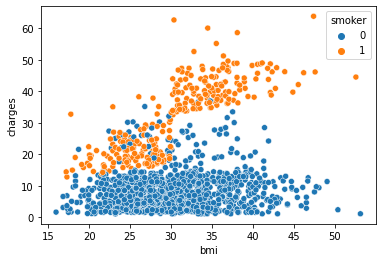

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

In [ ]:
X = dados[['bmi', 'charges']]
y = dados['smoker']

## Validação Cruzada

In [ ]:
# Configuração da Validação Cruzada utilizando KFold Repetido
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

In [ ]:
kf = RepeatedKFold(n_splits = 10, n_repeats = 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Regressão Logística

modelo = LogisticRegression()
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas

{'fit_time': array([0.01707959, 0.0104506 , 0.00975442, 0.01057434, 0.01073909,
        0.01111174, 0.00948286, 0.01161289, 0.0095439 , 0.00987029,
        0.01124454, 0.00946546, 0.0106113 , 0.00966287, 0.00978208,
        0.01105499, 0.01175976, 0.01417398, 0.01047182, 0.00984406,
        0.010988  , 0.01249814, 0.01079273, 0.01056123, 0.01039386,
        0.01018   , 0.01052237, 0.01077938, 0.01069832, 0.01245666,
        0.01091146, 0.01046205, 0.01037693, 0.0135839 , 0.01777649,
        0.01343632, 0.01200676, 0.01021147, 0.01146579, 0.01006031,
        0.00922751, 0.01105404, 0.01077127, 0.01008534, 0.00946546,
        0.01324105, 0.0098021 , 0.00928283, 0.00940323, 0.00981808]),
 'score_time': array([0.0011251 , 0.00116301, 0.00138283, 0.00195098, 0.0012846 ,
        0.00115633, 0.00146174, 0.00117707, 0.0011301 , 0.0011363 ,
        0.00116658, 0.00115085, 0.00126147, 0.00112081, 0.00145006,
        0.0011766 , 0.00116038, 0.00116587, 0.00115728, 0.001127  ,
        0.00129437, 

In [ ]:
medidas['test_score'].mean()

0.9323050162720234

In [ ]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9615890472449782

In [ ]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9635248569184154

## Combinação dos Modelos por Votos

Combinação Hard

Ela escolhe a maioria de resultados "0" ou "1".

In [ ]:
# Hard

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9645741218718439

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


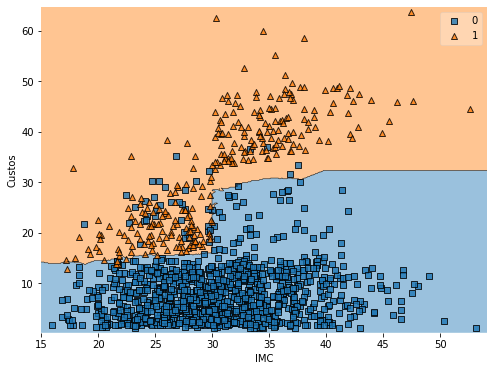

In [ ]:
# Visualizando comportamento da combinação hard no gráfico de decisão por região

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Combinação Soft

Ela faz a média das probabilidades dos modelos onde probalidade menor que 0.5 = 0 e probabilidade maior que 0.5 = 1.

In [ ]:
# Soft

from sklearn.ensemble import VotingClassifier

reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9647188867691618

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


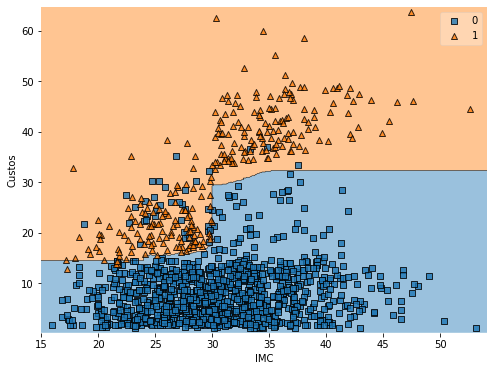

In [ ]:
# Visualizando comportamento da combinação soft no gráfico de decisão por região

modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# modelo_base = LogisticRegression()
# modelo_base = KNeighborsClassifier(n_neighbors = 17)
modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 100, base_estimator = modelo_base)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9639681292784199

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


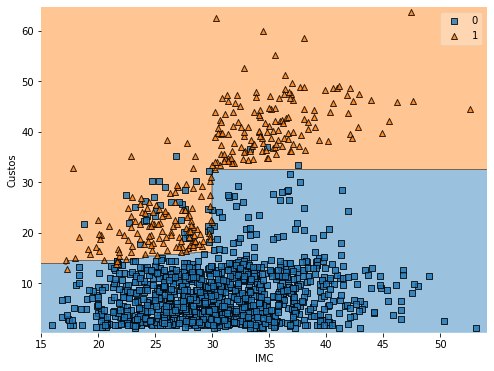

In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 100, max_depth = 5)
medidas = cross_validate(modelo, X, y, cv = kf, scoring = 'accuracy')
medidas['test_score'].mean()

0.9627774660531927

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


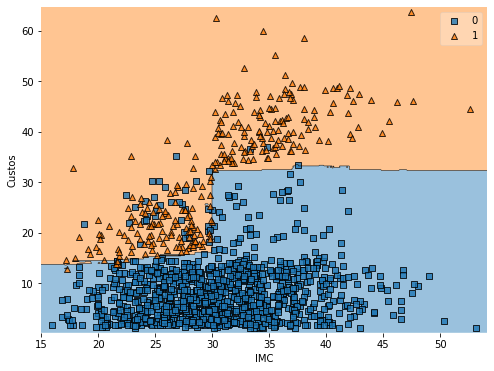

In [ ]:
modelo.fit(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

# Mais Métricas de Classificação

Validação do Modelo - Quero apenas escolher o melhor modelo ou também saber o seu erro de generalização?

In [ ]:
modelo = VotingClassifier(modelos, voting = 'soft')
modelo.fit(X, y)
preditos = modelo.predict(X)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
mc = confusion_matrix(y, preditos)

In [ ]:
mc

array([[1027,   37],
       [   5,  269]])

In [ ]:
def MetricasClassBinaria(observado, predito):
    from sklearn.metrics import confusion_matrix
    mc = confusion_matrix(observado, predito)
    vn, fp, fn, vp = mc.flatten()

    pre = observado.mean()
    acc = (vn + vp)/(vn + fp + fn + vp) 
    sen = vp/(vp + fn)
    esp = vn/(vn + fp)
    vpp = vp/(vp + fp)
    vpn = vn/(vn + fn) 
    mcc = (vp*vn - fp*fn)/np.sqrt((vp + fp)*(vp + fn)*(vn + fp)*(vn + fn))
    f1s = 2*vpp*sen/(vpp + sen) 
    efi = (sen + esp)/2

    print('  Prevalência de Positivos: {:.4f}'.format(pre))
    print('                  Acurácia: {:.4f}'.format(acc))
    print('             Sensibilidade: {:.4f}'.format(sen))
    print('            Especificidade: {:.4f}'.format(esp))
    print('  Valor Preditivo Positivo: {:.4f}'.format(vpp))
    print('  Valor Preditivo Negativo: {:.4f}'.format(vpn))
    print('Coef. de Corr. de Matthews: {:.4f}'.format(mcc))
    print('                  F1-Score: {:.4f}'.format(f1s))
    print('                Eficiência: {:.4f}'.format(efi))
 
    metricas = {'prevalência': pre, 'acurácia': acc, 'sensibilidade': sen, 
            'especificidade': esp, 'vpp': vpp, 'vpn': vpn, 'mcc': mcc,
            'f1-score': f1s, 'eficiência': efi}
 
    return metricas

In [ ]:
m = MetricasClassBinaria(y, preditos)

  Prevalência de Positivos: 0.2048
                  Acurácia: 0.9686
             Sensibilidade: 0.9818
            Especificidade: 0.9652
  Valor Preditivo Positivo: 0.8791
  Valor Preditivo Negativo: 0.9952
Coef. de Corr. de Matthews: 0.9099
                  F1-Score: 0.9276
                Eficiência: 0.9735


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#Fazendo a Divisão em Teste e Treinamento
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.20)

In [ ]:
modelo = LogisticRegression()
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas1 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2239
                  Acurácia: 0.9403
             Sensibilidade: 0.8000
            Especificidade: 0.9808
  Valor Preditivo Positivo: 0.9231
  Valor Preditivo Negativo: 0.9444
Coef. de Corr. de Matthews: 0.8230
                  F1-Score: 0.8571
                Eficiência: 0.8904


In [ ]:
modelo = KNeighborsClassifier(n_neighbors = 25)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas2 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2239
                  Acurácia: 0.9813
             Sensibilidade: 1.0000
            Especificidade: 0.9760
  Valor Preditivo Positivo: 0.9231
  Valor Preditivo Negativo: 1.0000
Coef. de Corr. de Matthews: 0.9492
                  F1-Score: 0.9600
                Eficiência: 0.9880


In [ ]:
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas3 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2239
                  Acurácia: 0.9739
             Sensibilidade: 0.9833
            Especificidade: 0.9712
  Valor Preditivo Positivo: 0.9077
  Valor Preditivo Negativo: 0.9951
Coef. de Corr. de Matthews: 0.9283
                  F1-Score: 0.9440
                Eficiência: 0.9772


In [ ]:

modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'hard')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas4 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2239
                  Acurácia: 0.9776
             Sensibilidade: 0.9833
            Especificidade: 0.9760
  Valor Preditivo Positivo: 0.9219
  Valor Preditivo Negativo: 0.9951
Coef. de Corr. de Matthews: 0.9379
                  F1-Score: 0.9516
                Eficiência: 0.9796


In [ ]:
modelo = VotingClassifier(estimators = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)], voting = 'soft')
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas5 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2239
                  Acurácia: 0.9739
             Sensibilidade: 0.9833
            Especificidade: 0.9712
  Valor Preditivo Positivo: 0.9077
  Valor Preditivo Negativo: 0.9951
Coef. de Corr. de Matthews: 0.9283
                  F1-Score: 0.9440
                Eficiência: 0.9772


In [ ]:
modelo = BaggingClassifier(n_estimators = 100)
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas6 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2239
                  Acurácia: 0.9627
             Sensibilidade: 0.9167
            Especificidade: 0.9760
  Valor Preditivo Positivo: 0.9167
  Valor Preditivo Negativo: 0.9760
Coef. de Corr. de Matthews: 0.8926
                  F1-Score: 0.9167
                Eficiência: 0.9463


In [ ]:
modelo = RandomForestClassifier(n_estimators = 200, max_depth = 7) 
modelo.fit(Xtreino, Ytreino)
preditos = modelo.predict(Xteste)
metricas7 = MetricasClassBinaria(Yteste, preditos)

  Prevalência de Positivos: 0.2239
                  Acurácia: 0.9739
             Sensibilidade: 0.9833
            Especificidade: 0.9712
  Valor Preditivo Positivo: 0.9077
  Valor Preditivo Negativo: 0.9951
Coef. de Corr. de Matthews: 0.9283
                  F1-Score: 0.9440
                Eficiência: 0.9772


In [ ]:
resultados0 = {'Regressão Logística': list(metricas1.values()),
              '25-Vizinhos + Próximos': list(metricas2.values()),
              'Árvore de Decisão': list(metricas3.values()),
              'Combinação Hard': list(metricas4.values()),
              'Combinação Soft': list(metricas5.values()),
              'Bagging': list(metricas6.values()),
              'Random Forest': list(metricas7.values())}
              
resultados = pd.DataFrame(resultados0, index = metricas1.keys()).T
resultados

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Regressão Logística,0.223881,0.940299,0.800000,0.980769,0.923077,0.944444,0.823003,0.857143,0.890385
25-Vizinhos + Próximos,0.223881,0.981343,1.000000,0.975962,0.923077,1.000000,0.949151,0.960000,0.987981
Árvore de Decisão,0.223881,0.973881,0.983333,0.971154,0.907692,0.995074,0.928267,0.944000,0.977244
Combinação Hard,0.223881,0.977612,0.983333,0.975962,0.921875,0.995098,0.937895,0.951613,0.979647
Combinação Soft,0.223881,0.973881,0.983333,0.971154,0.907692,0.995074,0.928267,0.944000,0.977244
Bagging,0.223881,0.962687,0.916667,0.975962,0.916667,0.975962,0.892628,0.916667,0.946314
Random Forest,0.223881,0.973881,0.983333,0.971154,0.907692,0.995074,0.928267,0.944000,0.977244


In [ ]:
resultados.sort_values(by = 'acurácia', ascending = False)

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
25-Vizinhos + Próximos,0.223881,0.981343,1.000000,0.975962,0.923077,1.000000,0.949151,0.960000,0.987981
Combinação Hard,0.223881,0.977612,0.983333,0.975962,0.921875,0.995098,0.937895,0.951613,0.979647
Árvore de Decisão,0.223881,0.973881,0.983333,0.971154,0.907692,0.995074,0.928267,0.944000,0.977244
Combinação Soft,0.223881,0.973881,0.983333,0.971154,0.907692,0.995074,0.928267,0.944000,0.977244
Random Forest,0.223881,0.973881,0.983333,0.971154,0.907692,0.995074,0.928267,0.944000,0.977244
Bagging,0.223881,0.962687,0.916667,0.975962,0.916667,0.975962,0.892628,0.916667,0.946314
Regressão Logística,0.223881,0.940299,0.800000,0.980769,0.923077,0.944444,0.823003,0.857143,0.890385


In [ ]:
from google.colab.data_table import DataTable
DataTable(resultados.round(4))

,prevalência,acurácia,sensibilidade,especificidade,vpp,vpn,mcc,f1-score,eficiência
Regressão Logística,0.2239,0.9403,0.8000,0.9808,0.9231,0.9444,0.8230,0.8571,0.8904
25-Vizinhos + Próximos,0.2239,0.9813,1.0000,0.9760,0.9231,1.0000,0.9492,0.9600,0.9880
Árvore de Decisão,0.2239,0.9739,0.9833,0.9712,0.9077,0.9951,0.9283,0.9440,0.9772
Combinação Hard,0.2239,0.9776,0.9833,0.9760,0.9219,0.9951,0.9379,0.9516,0.9796
Combinação Soft,0.2239,0.9739,0.9833,0.9712,0.9077,0.9951,0.9283,0.9440,0.9772
Bagging,0.2239,0.9627,0.9167,0.9760,0.9167,0.9760,0.8926,0.9167,0.9463
Random Forest,0.2239,0.9739,0.9833,0.9712,0.9077,0.9951,0.9283,0.9440,0.9772
